# Downloading Dataset from Github

In [1]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset.git

Cloning into 'PlantVillage-Dataset'...
remote: Counting objects: 163141, done.
remote: Total 163141 (delta 0), reused 0 (delta 0), pack-reused 163141
Receiving objects: 100% (163141/163141), 1.99 GiB | 32.50 MiB/s, done.
Resolving deltas: 100% (133/133), done.
Checking out files: 100% (163100/163100), done.


# Train Data Split

In [0]:
import os
import random
from shutil import copyfile
source_path = "PlantVillage-Dataset/raw/color"
target_path = "dataset"

In [31]:
# create target folder
if not os.path.isdir(target_path):
  os.makedirs(target_path)
  print(target_path+" is created")

# creating folder structure
if not os.path.isdir(target_path+"/train"):
  os.makedirs(target_path+"/train")
  print(target_path+"/train is created")
if not os.path.isdir(target_path+"/test"):
  os.makedirs(target_path+"/test")
  print(target_path+"/test is created")
if not os.path.isdir(target_path+"/valid"):
  os.makedirs(target_path+"/valid")
  print(target_path+"/valid is created")

dataset is created
dataset/train is created
dataset/test is created
dataset/valid is created


In [32]:
# split files into train, valid and test
data_count = 0
train_count = 0
test_count = 0
valid_count = 0
for class_name in os.listdir(source_path):
  train_class = target_path+"/train/"+ class_name
  test_class = target_path+"/test/"+ class_name
  valid_class = target_path+"/valid/"+ class_name
  # class folder creation
  if not os.path.isdir(train_class):
    os.makedirs(train_class)
    print(train_class+" is created..")
  if not os.path.isdir(test_class):
    os.makedirs(test_class)
    print(test_class+" is created..")
  if not os.path.isdir(valid_class):
    os.makedirs(valid_class)
    print(valid_class+" is created..")
  
  # file spliting
  for file in os.listdir(source_path+"/"+class_name):
    choice = random.randint(1,100)
    data_count = data_count + 1
    src_file = source_path+"/"+class_name+"/"+file
    if choice <= 80:
      dst_file = train_class+"/"+file
      copyfile(src_file,dst_file)
      train_count = train_count + 1
    elif choice <= 90 :
      dst_file = valid_class+"/"+file
      copyfile(src_file,dst_file)
      valid_count = valid_count + 1
    else:
      dst_file = test_class+"/"+file
      copyfile(src_file,dst_file)
      test_count = test_count + 1
    

dataset/train/Tomato___Bacterial_spot is created..
dataset/test/Tomato___Bacterial_spot is created..
dataset/valid/Tomato___Bacterial_spot is created..
dataset/train/Tomato___Leaf_Mold is created..
dataset/test/Tomato___Leaf_Mold is created..
dataset/valid/Tomato___Leaf_Mold is created..
dataset/train/Raspberry___healthy is created..
dataset/test/Raspberry___healthy is created..
dataset/valid/Raspberry___healthy is created..
dataset/train/Orange___Haunglongbing_(Citrus_greening) is created..
dataset/test/Orange___Haunglongbing_(Citrus_greening) is created..
dataset/valid/Orange___Haunglongbing_(Citrus_greening) is created..
dataset/train/Soybean___healthy is created..
dataset/test/Soybean___healthy is created..
dataset/valid/Soybean___healthy is created..
dataset/train/Apple___Black_rot is created..
dataset/test/Apple___Black_rot is created..
dataset/valid/Apple___Black_rot is created..
dataset/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot) is created..
dataset/test/Grape___Leaf_blig

In [33]:
print("---------------------Summary---------------------")
print("Train Data set: ")
print("Total Classes : "+str(len(os.listdir(target_path+"/train"))))
print("Data count    : "+str(train_count))
print("\n")

print("Valid Data set: ")
print("Total Classes : "+str(len(os.listdir(target_path+"/valid"))))
print("Data count    : "+str(valid_count))
print("\n")

print("Test Data set: ")
print("Total Classes : "+str(len(os.listdir(target_path+"/test"))))
print("Data count    : "+str(test_count))
print("\n")

---------------------Summary---------------------
Train Data set: 
Total Classes : 38
Data count    : 43638


Valid Data set: 
Total Classes : 38
Data count    : 5300


Test Data set: 
Total Classes : 38
Data count    : 5367




# ResNet50

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from matplotlib import pyplot as plt
import numpy as np

In [0]:
# load model with top layer
model = ResNet50(weights='imagenet')

In [36]:
# view the model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

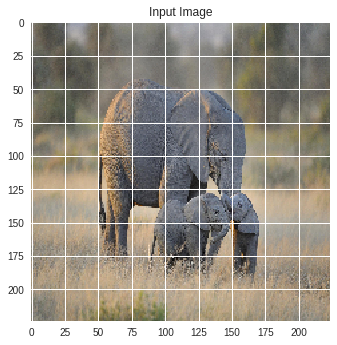

In [37]:
# input image
img_path = 'imageNet/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# plt the input
plt.imshow(img)
plt.title("Input Image")

# pre processing
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


In [38]:
# prediction
preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
for id in decode_predictions(preds, top=3)[0]:
  print (id[1]+'----'+str(id[2]))

African_elephant----0.53224856
tusker----0.45342177
Indian_elephant----0.006528283


In [0]:
# Load model without top layer
resnet50_tl = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [40]:
# view model
resnet50_tl.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
# to perform transfer learning
from keras import models
from keras import layers
from keras import optimizers

In [53]:
# Freeze all layers
for layer in resnet50_tl.layers:
    layer.trainable = False

# Create the model
resnet50 = models.Sequential()

# Add pretrained ResNet50 model
resnet50.add(resnet50_tl)

# Adding new layers
resnet50.add(layers.Flatten())
resnet50.add(layers.Dense(1024, activation='relu'))
resnet50.add(layers.Dropout(0.5))
resnet50.add(layers.Dense(512, activation='relu'))
resnet50.add(layers.Dropout(0.5))
resnet50.add(layers.Dense(38, activation='softmax'))

# view the model
resnet50.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 38)                19494     
Total para

In [43]:
# creating train, valid and test generater
from keras.preprocessing.image import ImageDataGenerator

train_dir = target_path + "/train"
validation_dir = target_path + "/valid"
test_dir = target_path + "/test"
image_size = 224

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 500
val_batchsize = 100
test_batchsize = 100
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

test_generator = validation_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size=test_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 43638 images belonging to 38 classes.
Found 5300 images belonging to 38 classes.
Found 5367 images belonging to 38 classes.


In [54]:
# Tranfer learning
#RMSprop(lr=1e-4),
# Compile the model
resnet50.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(), 
              metrics=['acc'])
# Train the model
history = resnet50.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=3,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
resnet50.save('dataset/resnet-1.h5')


Epoch 1/3
87/87 [==============================] - 738s 8s/step - loss: 0.9570 - acc: 0.7355 - val_loss: 4.3536 - val_acc: 0.0987
Epoch 2/3
 9/87 [==>...........................] - ETA: 9:28 - loss: 0.3717 - acc: 0.8833

KeyboardInterrupt: ignored

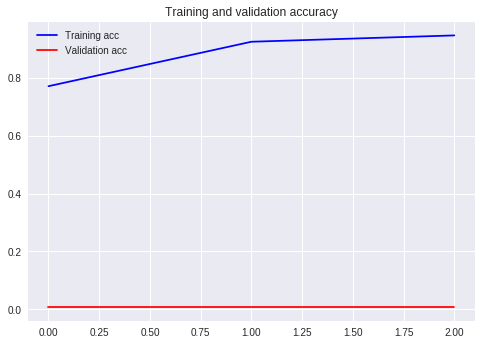

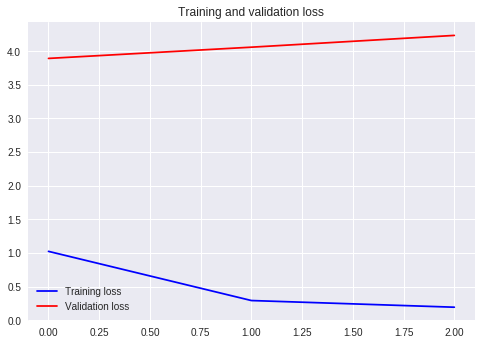

In [45]:
# Output Visualization
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [46]:
# Testing our model
score = resnet50.evaluate_generator(test_generator)
print("Test Loss     : "+str(score[0]))
print("Test Accuracy : "+str(score[1]))

Test Loss     : 4.219273707843125
Test Accuracy : 0.005403390938240166
